In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # более красивый внешний вид графиков по умолчанию

In [2]:
df = pd.read_csv("../resources/cardio_train.csv", sep=";", index_col="id")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [3]:
df.tail().T  # Транспортировать вывод

id,99993,99995,99996,99998,99999
age,19240.0,22601.0,19066.0,22431.0,20540.0
gender,2.0,1.0,2.0,1.0,1.0
height,168.0,158.0,183.0,163.0,170.0
weight,76.0,126.0,105.0,72.0,72.0
ap_hi,120.0,140.0,180.0,135.0,120.0
ap_lo,80.0,90.0,90.0,80.0,80.0
cholesterol,1.0,2.0,3.0,1.0,2.0
gluc,1.0,2.0,1.0,2.0,1.0
smoke,1.0,0.0,0.0,0.0,0.0
alco,0.0,0.0,1.0,0.0,0.0


In [4]:
df.info()  #есть ли в данных пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [6]:
df["cardio"].value_counts()  # сбалансированные классы

0    35021
1    34979
Name: cardio, dtype: int64

In [7]:
df["cardio"].value_counts(normalize=True)  # процентное соотношение

0    0.5003
1    0.4997
Name: cardio, dtype: float64

<AxesSubplot:>

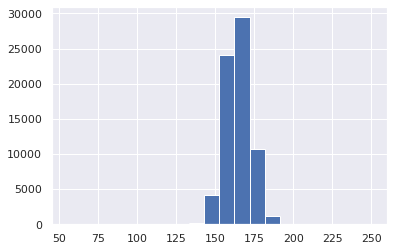

In [8]:
df["height"].hist(bins=20)

<AxesSubplot:xlabel='height'>

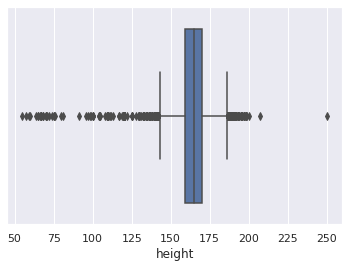

In [9]:
sns.boxplot(df["height"])

In [10]:
df["age"] = (df["age"] / 365).round(0)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1


In [11]:
df.groupby("cardio")["age"].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

Text(0, 0.5, 'age')

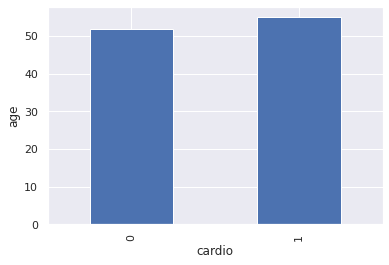

In [12]:
df.groupby("cardio")["age"].mean().plot(kind="bar")
plt.ylabel("age")

# Библиотека SNS

countplot 

<AxesSubplot:xlabel='count', ylabel='age'>

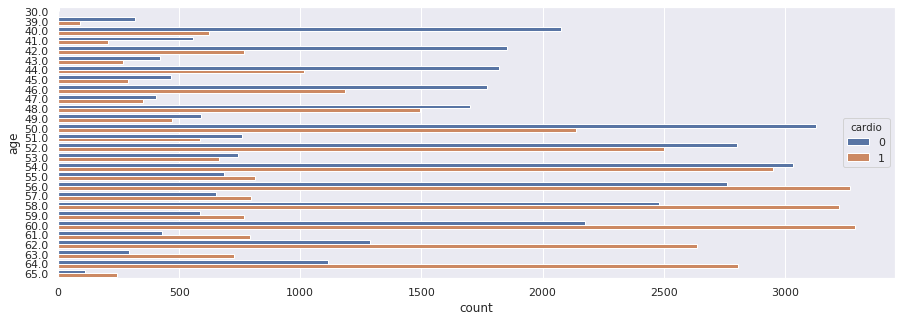

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(y="age", hue="cardio", data=df)

Scatter plot¶(диаграмма рассеяния)


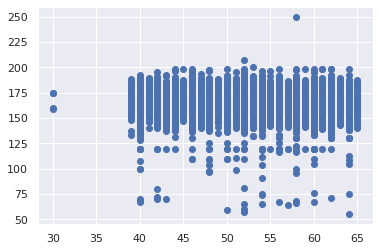

In [14]:
plt.scatter(df["age"], df["height"])

jointplot (совместное распределение двух числовых признаков )

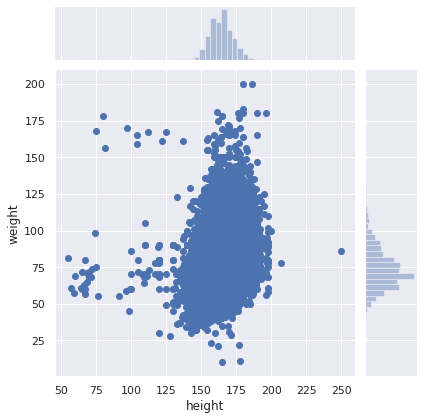

In [15]:
sns.jointplot(x="height",y="weight",data=df);

pivot tables

In [16]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка

In [17]:
df.pivot_table(values=["age","cardio"],index=["smoke","alco"],aggfunc="mean")

age    cardio
smoke alco                     
0     0     53.449185  0.501462
      1     53.121990  0.523037
1     0     52.493627  0.487833
      1     51.838188  0.444444

Crosstab (таблица сопряжённости)

In [18]:
pd.crosstab(df["smoke"],df["alco"])

alco,0,1
smoke,,
0,61921,1910
1,4315,1854


##### обработка столбцов

In [19]:
height=df["height"]
type(height)

pandas.core.series.Series

##### обработка строк

In [20]:
# implicit loc (неявный индекс)
first_patient=df.iloc[0]
first_patient

age             50.0
gender           2.0
height         168.0
weight          62.0
ap_hi          110.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0, dtype: float64

In [21]:
# явный индекс
first_patient=df.loc[0,"age"]
first_patient

50.0

In [22]:
height_m=height/100
height_m[:10]

id
0     1.68
1     1.56
2     1.65
3     1.69
4     1.56
8     1.51
9     1.57
12    1.78
13    1.58
14    1.64
Name: height, dtype: float64

task in Python-style

In [23]:
%%timeit
lilliputs=-0
for value in height:
    if value<125:
        lilliputs=lilliputs+1

4.9 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


task in NumPy-style

In [24]:
%%timeit
height[height<125].shape[0]

404 µs ± 38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
df[df["smoke"]==1]["age"].mean()

52.29664451288701

In [26]:
df[(df["smoke"]==1)&(df["alco"]==1)]["age"].mean()

51.83818770226537

### Фильтрация датафрейма. Удаление строк и столбцов

In [28]:
dum_df=df.drop("cardio",axis=1)
dum_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [38]:
# нахождение процента выбросов
dum_df=df.drop(df[(df["height"]<125)|(df["height"]>200)].index)
dum_df.shape[0]/df.shape[0]

0.9987285714285714

оставшаяся выборка составляет 99.9 % исходной

In [39]:
dum_df.shape[0]

69911

In [45]:
# удаление строк
dum_df_test=dum_df.drop(np.arange(5),axis=0)
dum_df_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
8,60.0,1,151,67.0,120,80,2,2,0,0,0,0
9,61.0,1,157,93.0,130,80,3,1,0,0,1,0
12,62.0,2,178,95.0,130,90,3,3,0,0,1,1
13,48.0,1,158,71.0,110,70,1,1,0,0,1,0
14,54.0,1,164,68.0,110,60,1,1,0,0,0,0


### Добавление новых признаков¶

In [47]:
df["height_m"]=df["height"]/100
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m
id,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,1.68
99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,1.58
99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,1.83


### Перекодировка значений признаков

In [48]:
#  label encoding (замена одних значений другими)
new_values={1:"low",2:"middle",3:"high"}
df["dum_cholesterol"]=df["cholesterol"].map(new_values)

In [49]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,dum_cholesterol
id,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68,low
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56,high
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65,high
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69,low
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56,low


In [50]:
# перекодировка целевого признака в логический (True/Falce)
df["cardio"]=df["cardio"].astype(bool)

In [51]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,dum_cholesterol
id,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,2,168,76.0,120,80,1,1,1,0,1,False,1.68,low
99995,62.0,1,158,126.0,140,90,2,2,0,0,1,True,1.58,middle
99996,52.0,2,183,105.0,180,90,3,1,0,1,0,True,1.83,high
